 ## John D Noble Project 2: Enews Express            September 2021

## Import Basic Libraries

In [1]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

zsh:1: no matches found: pandas-profiling[notebook]
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
from pandas.api.types import is_string_dtype, is_numeric_dtype

import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import widgets

import numpy as np

# Detailed Profiling Widget
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

import scipy

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats  

pd.set_option("display.precision", 2)

import warnings
warnings.filterwarnings('ignore')


In [3]:
import scipy
scipy.__version__

'1.6.1'

## Business Problem


Business Problem

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

4 Key Questions to be answered:

    Do the users spend more time on the new landing page than the old landing page?
    Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    Does the converted status depend on the preferred language?
    Is the mean time spent on the new page same for the different language users?

Data Dictionary

Data File: abtest.csv

Data Dictionary:

    user_id - This represents the user ID of the person visiting the website.
    group - This represents whether the user belongs to the first group (control) or the second group (treatment).
    landing_page - This represents whether the landing page is new or old.
    time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
    converted - This represents whether the user gets converted to a subscriber of the news portal or not.
    language_preferred - This represents the language chosen by the user to view the landing page.



## Data Dictionary

## 1 -  Exploratory Data Analysis - Explore & Extract insights from the data.

In [4]:
#Read in dataset
df = pd.read_csv('abtest.csv')
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.shape

(100, 6)

### 1a. Know Your Data ###

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### 1b. Clean Data - Remove User_ID: 100 unique users & Change to Categories

In [7]:
#How many IDS are unique?
df.user_id.nunique()

100

In [8]:
#df.converted = df.converted.astype('category') 
#df.landing_page = df.landing_page.astype('category') 

In [9]:
#User ID has 100 unique values and does not contribute to EDA; drop the column
#df = df.drop(['user_id'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [11]:
df.describe(include = 'all').T

NumExpr defaulting to 8 threads.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,"546,517.00",52.30,"546,443.00","546,467.75","546,492.50","546,567.25","546,592.00"
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# missing values #
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [13]:
#How many rows in the dataset?
df.shape[0]

100

In [14]:
df.describe (include = ['float64']).T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.00,5.38,2.38,0.19,3.88,5.42,7.02,10.71


In [15]:
df.describe (include = ['object']).T 


,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


### 2.  DETAILED PANDAS PROFILING REPORT WIDGET

>> NOTE THE WIDGET DOESNT NOT SHOW UP IN HTML VERSION<<
#DETAILED PANDAS PROFILING REPORT WIDGET

In [16]:

profile = ProfileReport(df, title="AB TEST", html={"style": {"full_width": True}}, sort=None)
profile.to_widgets()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights



### 2b. Organize The Data Into Numeric and Categorical

In [17]:
## This is a little redundant, but add it going forward to each workbook; NOTE you need to specifiy the varibale...each time,

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="#ebf5fb"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

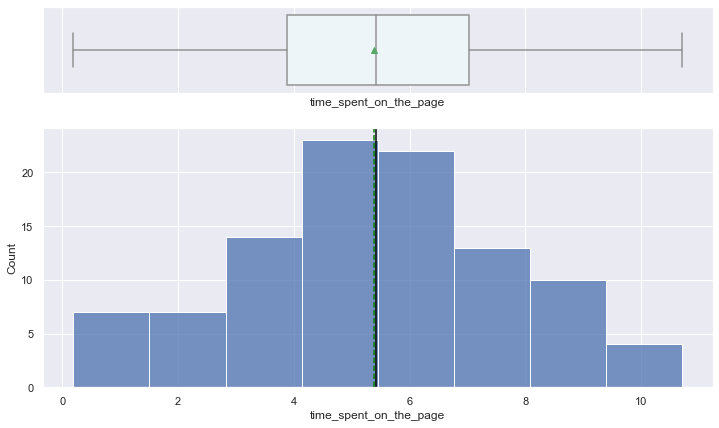

In [19]:
histogram_boxplot(df, 'time_spent_on_the_page');

In [20]:
### Seperate the data by type - numeric and categorical for Univaritate and Mulitvariate Analysis
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)

['user_id', 'time_spent_on_the_page']
['group', 'landing_page', 'converted', 'language_preferred']


### 3. Univariate

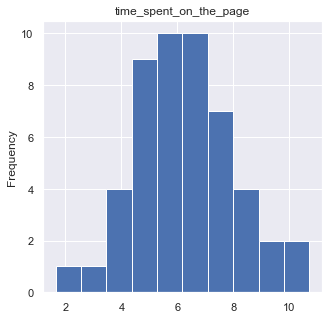

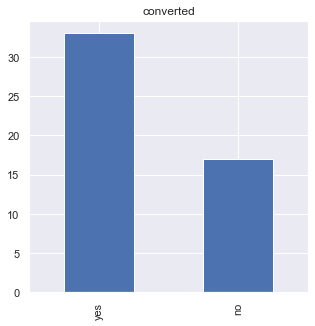

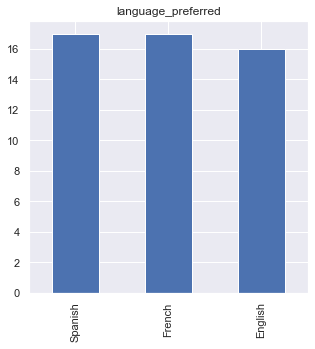

In [53]:
# bar chart and histogram
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data

        df[column].value_counts()[:10].plot(kind = 'bar')


### Insight


## 4.  Multivariate Analysis

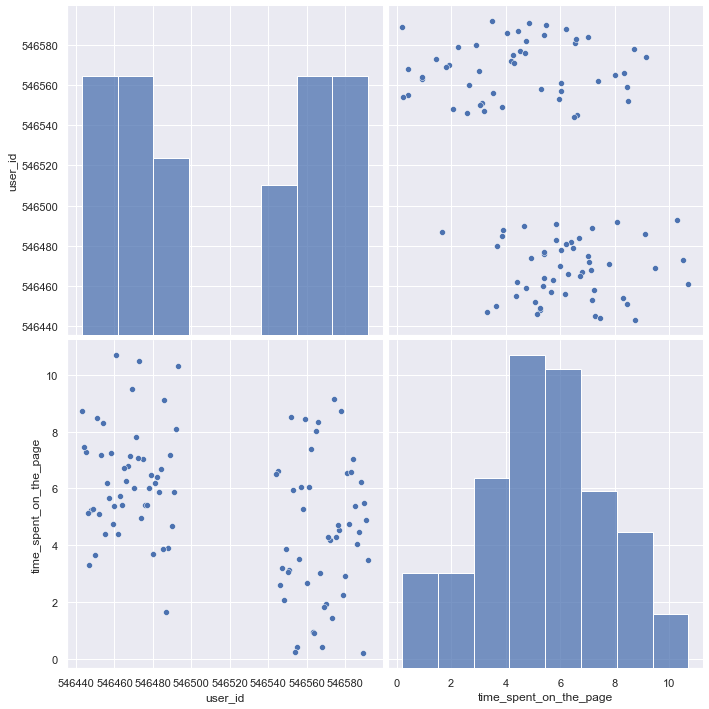

In [22]:
# pairplot
sns.pairplot(df,height = 5)

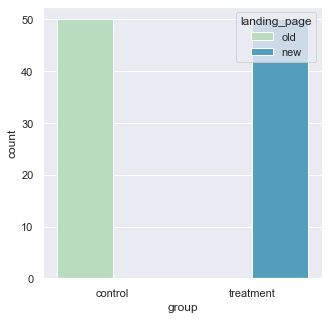

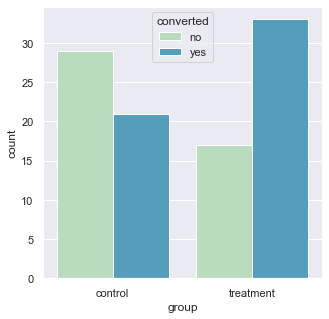

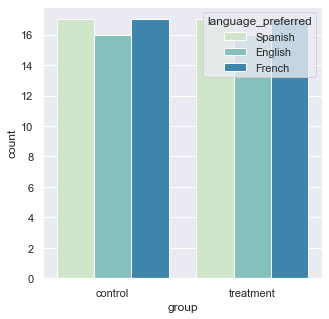

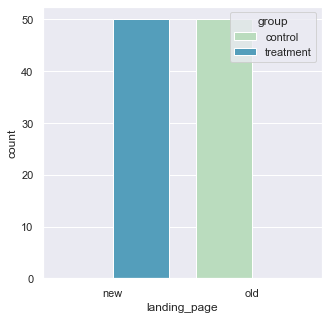

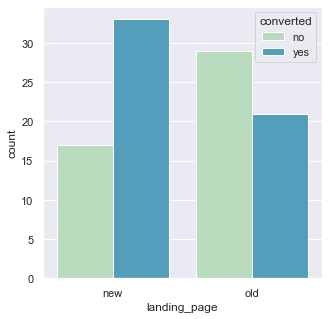

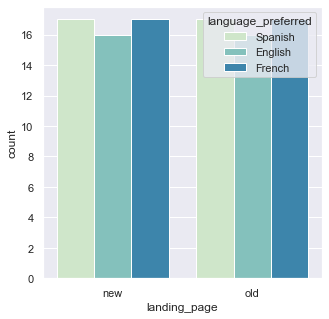

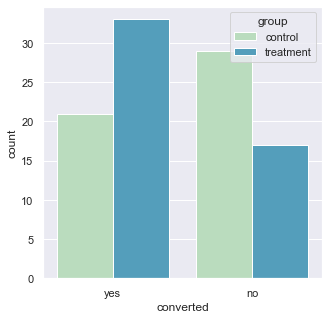

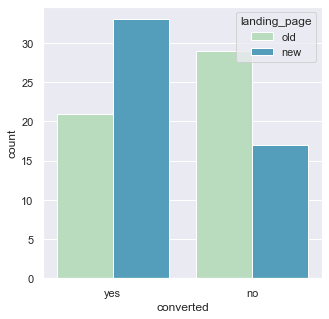

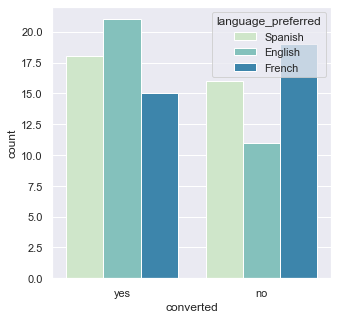

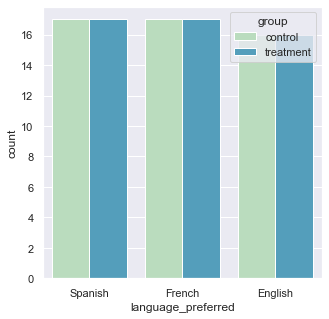

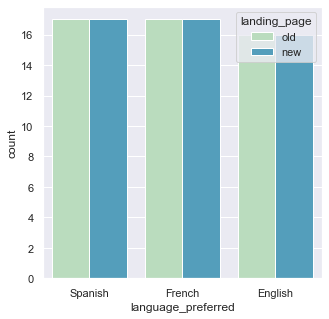

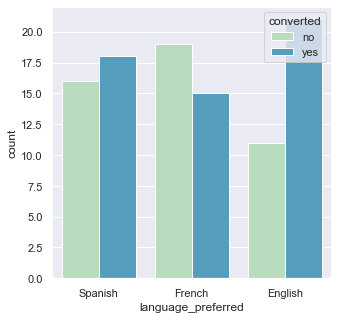

In [23]:
# grouped bar chart
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (5,5))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'GnBu',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )



### Insight
 - 'NEW' plot shows clearly conversions for the new page > than conversion for old page (more "no")

## 5. Categorical vs. Numerical → boxplot or pairplot with hue

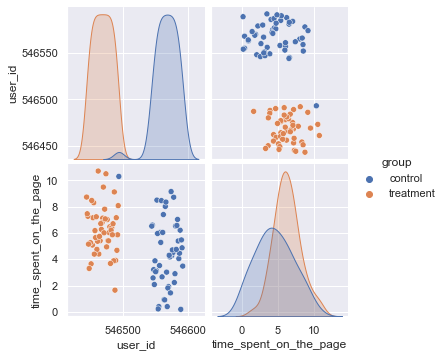

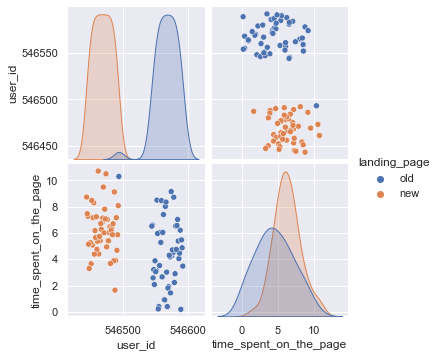

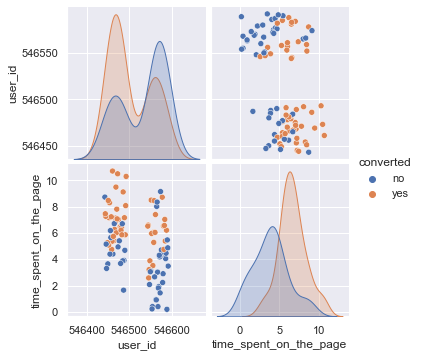

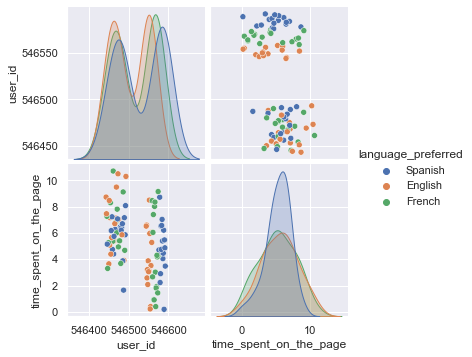

In [24]:
# pairplot with hue
for i in range(0, len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)

### Insight
- distrabution clearly shows users spend more time on the "new" page vs old page
- of those, users who choose Spanish appear to spend more time than English and French Users***could be a location specific translation issue e.g Spain > Spanish vs MExico > Spanish

<Figure size 360x360 with 0 Axes>

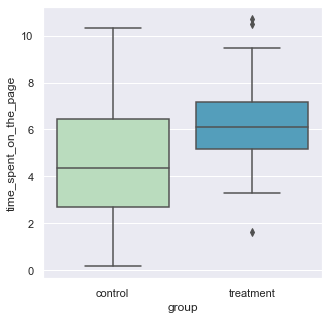

<Figure size 360x360 with 0 Axes>

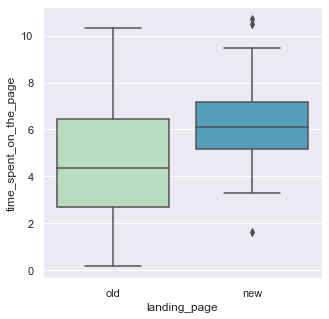

<Figure size 360x360 with 0 Axes>

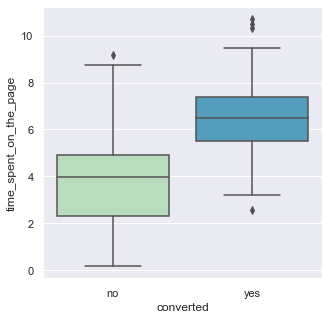

<Figure size 360x360 with 0 Axes>

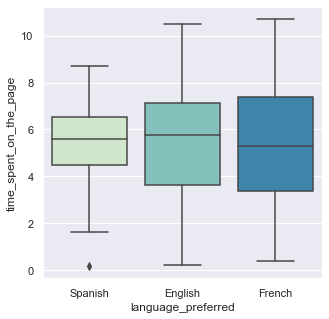

In [25]:
# box plot
for i in range(0, len(cat_list)):
    cat = cat_list[i]
    for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure (figsize = (5,5))
    sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")

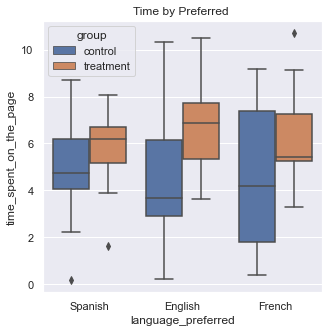

In [26]:
#A view of how the new page and old page compare by which language the users selects.
plt.figure(figsize=(5,5))
ax = sns.boxplot(df['language_preferred'], df['time_spent_on_the_page'], hue=df['group']);
ax.set_title('Time by Preferred ', fontsize=12);

### Insight
- plot shows mean time spent on new vs old landing page appears to be more based on the mean; same observation based on based on which page they are shown
- plot shows mean users that do not convert spend less time on the page than those that do convert
- While the means appear to be similar for time spend on the page, there appear to be varoances based on which lanuage e.g. French has the widest range, then englsih, and lastly Spanish.

### Insight 

- Given that that all 100 users are unqiue; drop this variable as it provides no insight into our current test.

# Questions  


1) Do the users spend more time on the new landing page than the old landing page?

2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3) Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4) Is the mean time spent on the new page same for the different language users?


## Question 2: Do the users spend more time on the new landing page than the old landing page? More time on one page = one-tailed test

In [27]:
## Define the two variables...subset the data into two to test
#time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page]

In [28]:
# import the data
time = pd.read_csv('newold.csv')
time.head()

,New,Old
0,7.13,3.48
1,4.40,3.02
2,4.75,5.28
3,5.25,6.53
4,10.71,2.08


In [29]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   New     50 non-null     float64
 1   Old     50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [30]:
# find the sample means and sample standard deviations for the two samples
print('The mean new page time group is ' + str(time['New'].mean()))
print('The mean old page time group is ' + str(time['Old'].mean()))
print('The standard deviation of new page time group is ' + str(round(time['New'].std(), 2)))
print('The standard deviation of old page time group is ' + str(round(time['Old'].std(), 2)))

The mean new page time group is 6.2232
The mean old page time group is 4.532400000000001
The standard deviation of new page time group is 1.82
The standard deviation of old page time group is 2.58


Let's test whether the T-test assumptions are satisfied or not

- Continuous data - Yes, the time spent  is measured on a continuous scale.
- Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
- Independent populations - As we are taking a random samples split into two samples are from two independent populations.
- Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
- Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


We can use two sample T-test for this problem.



In [31]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time['New'], time['Old'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


 #### Insight

As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis.
Hence, we do have enough evidence to support the claim that new page time is > the old page mean time.

## Question 3: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page >  than the conversion rate for the old page?

In [32]:
df = pd.read_csv('abtest.csv')

#Total conversions out of 100 - (control+treatment)/100
df['converted'].value_counts(normalize=True)

yes   0.54
no    0.46
Name: converted, dtype: float64

#### QUESTION 3a > Compare Total Conversion Counts for Control & Treatment
table1a.query('converted == ["yes"]')

In [33]:
# Is the new page conversion rate > conversion rate for old page?
table1a = pd.pivot_table(df, index=['group','converted' ],
aggfunc={ len, np.mean, np.std})
#table1a (to see full table)
table1a.query('converted == ["yes"]')#shows only the "yes"

time_spent_on_the_page           user_id                 
                                       len mean  std     len       mean   std
group     converted                                                          
control   yes                        21.00 6.17 1.93   21.00 546,560.14 21.64
treatment yes                        33.00 6.91 1.51   33.00 546,467.55 13.71

In [34]:
# QUESTION 3b > Conversion rate for old page

#Control conversion rate as a % of 50
C1 = 21/50
C1

0.42

In [35]:
# QUESTION 3c > Conversion Counts for new page

#Treatment conversion rate as a % of 50
c2 = 33/50
c2

0.66

Are the Z-test assumptions met? Yes, a user converts or not = binomially distrabuted.

1: The number of observations n is fixed > CONDITION MET

2: Each observation is independent. > CONDITION MET

3: Each observation represents one of two outcomes ("success" or "failure"). > CONDITION MET

4: The probability of "success" p is the same for each outcome.> CONDITION MET

Null Hypothesis :- there is no difference in the proportion (conversion rate) of the new page vs old page.
        Ho: p1 = p2

Alternate Hypothesis :- the conversion rate of the new page is > than the old page.
       Ha: p2 > p1
       
Two Proportion z-Test

In [36]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of convdersions items
defect_count = np.array([21, 33])

# set the sample sizes (dont have to be equal)
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Insight

As the p-value (~0.016) is less than the level of significance, we can reject the null hypothesis.

The page observed conversion rate (66.00%) was 57.14% higher than old page's conversion rate (42.00%). You can be 95% confident that this result is a consequence of the changes you made and not a result of random chance.


## Question 4: Does the converted status depend on the preferred language? 

[Hint: Create a contingency table using the pandas.crosstab() function]

### 4a. Conversion By Language

In [37]:
#Total conversions by group w/ mean of time spent on the page. NOTE USER_ID IS USELESS
table1b = pd.pivot_table(df, index=['group','converted', 'language_preferred'],
aggfunc={ len, np.mean, np.std})
#aggfunc={ len, np.mean, np.std, np.min, np.max})
#table1b # will show both converted and not converted in full table
table1b.query('converted == ["yes"]').T #shows only the "yes"

group                          control                        treatment  \
converted                          yes                              yes   
language_preferred             English     French    Spanish    English   
time_spent_on_the_page len       11.00       3.00       7.00      10.00   
                       mean       5.67       7.30       6.46       7.36   
                       std        2.34       1.21       1.26       1.74   
user_id                len       11.00       3.00       7.00      10.00   
                       mean 546,545.45 546,560.67 546,583.00 546,463.20   
                       std       18.09       1.53       3.16      12.61   

group                                              
converted                                          
language_preferred              French    Spanish  
time_spent_on_the_page len       12.00      11.00  
                       mean       6.95       6.48  
                       std        1.75       0.89  
user_id                len       12.00      11.00  
                       mean 546,463.75 546,475.64  
                       std       13.09      12.71

### 4b. Conversion by Language - a contingency table(cross tabulation)

In [38]:
#In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: 
#a contingency table, also called a cross tabulation. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one 
#variable conditional on the other by looking along a column or row
data_crosstab = pd.crosstab([df.converted ], 
    df.language_preferred,  margins = True, normalize=False).T
print(data_crosstab)

converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100


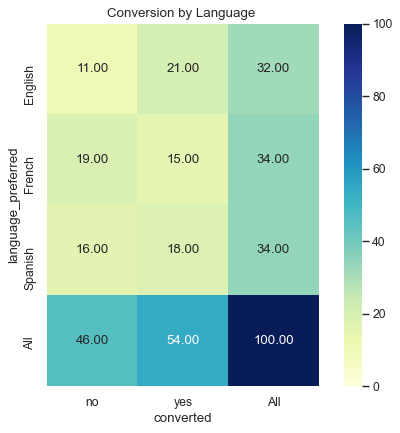

In [39]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(data_crosstab, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)

plt.title('Conversion by Language ',fontsize=12)

plt.show()

>> Chi-Squared Test of Independence

    Null Hypothesis(H0): There is no association between conversion and language.
    
    Alternative Hypothesis (HA): There is an association between conversion and language, the variables are dependent. 



The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in workclass depend on income, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the Pearson’s Chi-Squared test.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent


In [40]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=6
p_value 0.7970832186581234
[[ 14.72  17.28  32.  ]
 [ 15.64  18.36  34.  ]
 [ 15.64  18.36  34.  ]
 [ 46.    54.   100.  ]]
probability=0.950, critical=12.592, stat=3.093
Independent (fail to reject H0)


### Insight


With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these categorical variable.
We can conclude that is no dependency of "language prefered" attribute on the target variable "conversion'



## Question 5: Is the mean time spent on the new page same for the different language users?

In [41]:
#Time spent on the page. NOTE USER_ID IS USELESS
table1b = pd.pivot_table(df, index=['group', 'language_preferred'],
aggfunc={ len, np.mean, np.std})
#aggfunc={ len, np.mean, np.std, np.min, np.max})
#table1b # will show both converted and not converted in full table
#table1b.query('converted == ["yes"]').T #shows only the "yes"
table1b

time_spent_on_the_page           user_id  \
                                                len mean  std     len   
group     language_preferred                                            
control   English                             16.00 4.45 2.77   16.00   
          French                              17.00 4.31 3.02   17.00   
          Spanish                             17.00 4.83 1.99   17.00   
treatment English                             16.00 6.66 1.98   16.00   
          French                              17.00 6.20 1.93   17.00   
          Spanish                             17.00 5.84 1.53   17.00   

                                               
                                   mean   std  
group     language_preferred                   
control   English            546,547.38 15.13  
          French             546,567.00  5.05  
          Spanish            546,584.00  5.05  
treatment English            546,461.88 13.44  
          French             546,466.65 14.27  
          Spanish            546,473.65 14.33

### ANOVA Hypotheses

    Null hypothesis: Groups means are equal (no variation in means of groups)
    H0: μ1=μ2=…=μp
    
    Alternative hypothesis: At least, one group mean is different from other groups
    H1: All μ are not equal


In [42]:
#Read in dataset
df = pd.read_csv('tefs.csv')
df.head(5)

,time_spent_on_the_page,converted,language_preferred
0,7.13,yes,English
1,4.40,no,Spanish
2,4.75,yes,Spanish
3,5.25,yes,French
4,10.71,yes,French


In [43]:
#Find the mean() for time spent on the the new page only or different languages

english = df[(df['language_preferred'] == 'English')].mean()
french = df[(df['language_preferred'] == 'French')].mean()
spanish = df[(df['language_preferred'] == 'Spanish')].mean()

print (english)
print (french)
print (spanish)

time_spent_on_the_page   6.66
dtype: float64
time_spent_on_the_page   6.20
dtype: float64
time_spent_on_the_page   5.84
dtype: float64


In [44]:
print('The mean new page time group is ' + str(time['New'].mean()))

print('The standard deviation of new page time group is ' + str(round(time['New'].std(), 2)))


The mean new page time group is 6.2232
The standard deviation of new page time group is 1.82


In [45]:
#Read in dataset
df = pd.read_csv('tefs.csv')
df.head(5)

,time_spent_on_the_page,converted,language_preferred
0,7.13,yes,English
1,4.40,no,Spanish
2,4.75,yes,Spanish
3,5.25,yes,French
4,10.71,yes,French


In [46]:
# get the levels of factor language
df['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

Let's write the null and alternative hypothesis

Let 𝜇1,𝜇2,𝜇3

be the means of time spent by English, French, and Spanish respectively.

We will test the null hypothesis

    𝐻0:𝜇1=𝜇2=𝜇3

against the alternative hypothesis

    𝐻𝑎:

At least time spent is different from the rest.

language_preferred
English   6.66
French    6.20
Spanish   5.84
Name: time_spent_on_the_page, dtype: float64


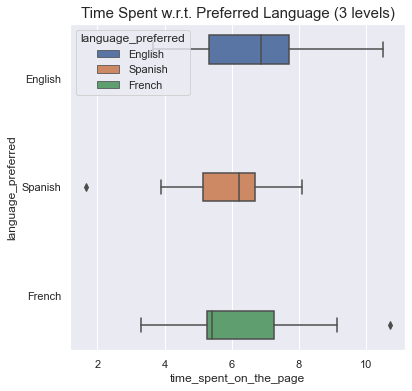

In [47]:
# mean of time spent  at different languages factor
print(df.groupby('language_preferred')['time_spent_on_the_page'].mean())

# draw the boxplot for visualization 

fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= 'time_spent_on_the_page', y = 'language_preferred', data = df, hue = 'language_preferred')
a.set_title("Time Spent w.r.t. Preferred Language (3 levels)", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked.

    For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

    For equality of variance, Levene test is applied to the response variable.



>> Shapiro-Wilk’s test

We will test the null hypothesis

    𝐻0:

    Time spent on new page follows a normal distribution against

against the alternative hypothesis

    𝐻𝑎:

Time Spent on New Page does not follow a normal distribution

In [48]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Insight

Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.



>> Levene’s test

We will test the null hypothesis

    𝐻0

    : All the population variances are equal

against the alternative hypothesis

    𝐻𝑎

: At least one variance is different from the rest

In [49]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                            
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                                      
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value

print('The p-value is', p_value)
                                
                          

The p-value is 0.46711357711340173


### Insight

Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

Let's test whether the assumptions are satisfied or not

- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Find the p-value

In [50]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is larger than the significance level, we can fail reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that at least one of the time spent is different from the rest at 5% significance level.


## Information & Reference Sources

https://www.kaggle.com/alokevil/simple-eda-for-beginners

https://sabman83.github.io/data-analysis/2016-12-05-spanish-translation/

https://www.visual-design.net/post/semi-automated-exploratory-data-analysis-process-in-python

